In [3]:
import pandas as pd
from filenames_and_paths import *

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


# Dynamic

In [17]:
dynamic_statistics = pd.read_csv(folders.save_data + folders.statistics + "dynamic_statistics.csv")

In [18]:
# for i in range(4):
#     # print(f'Microstate_{i}_to_{i}')
#     if f'Microstate_{i}_to_{i}' in dynamic_statistics.columns:
#         dynamic_statistics.drop(f'Microstate_{i}_to_{i}', axis=1, inplace=True)
#     else:
#         print(f'Microstate_{i}_to_{i} not found or already dropped')
# print("Dropped self-to-self transitions")

Dropped self-to-self transitions


In [19]:
# dynamic_statistics.set_index(["subject", "filename"]).drop("rest_state", axis=1).plot()

In [39]:
from matplotlib import lines
# 
# columns = dynamic_statistics.set_index(["subject", "filename", "rest_state"]).columns
# print(f'Columns: {columns}')
# for column in columns[0:0]: #!!!!!!!!!!!!!!!!!!!
#     dropping = [x for x in columns if (x != column)]
#     print(f'Dropping {dropping}')
#     for filename in dynamic_statistics["subject"].unique()[0:0]: #!!!!!!!!!!!!!!!!!!!!!
#         # for rest_state in dynamic_statistics["rest_state"].unique():
#         buf = dynamic_statistics[(dynamic_statistics["subject"] == filename)]
#         if buf.shape[0] > 0:
#             buf = buf.drop(dropping, axis=1).set_index(["subject", "filename"])#.set_index(["subject", "filename", "rest_state"])
#             buf_nors = buf.drop("rest_state", axis=1)
#             # buf.plot()
#             plot = buf_nors.plot()
#             plot.set_title(f'{filename} {column}')
#             plot.set_xlabel('rest_state')
#             plot.plot([2.5, 2.5], [0.002, 0.0040], color='black', linestyle='dashed')
#             plot.set_xticks(range(len(buf['rest_state'])))
#             plot.set_xticklabels(buf['rest_state'], rotation=0)

Columns: Index(['Microstate_0_to_1', 'Microstate_0_to_2', 'Microstate_0_to_3',
       'Microstate_1_to_0', 'Microstate_1_to_2', 'Microstate_1_to_3',
       'Microstate_2_to_0', 'Microstate_2_to_1', 'Microstate_2_to_3',
       'Microstate_3_to_0', 'Microstate_3_to_1', 'Microstate_3_to_2'],
      dtype='object')


In [44]:

# normalize
vals = dynamic_statistics.drop(['subject', 'filename', 'rest_state'], axis=1)
scaler = StandardScaler()
scaler.fit(vals)
normal_vals = scaler.transform(vals)

In [58]:
X_vals = normal_vals
y_vals = dynamic_statistics['rest_state'].to_numpy()
X = X_vals
y = y_vals

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# print(X_train.shape, X_test.shape, len(y_train), len(y_test))

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Acc:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
test_pred_value_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(classification_report(y_test, y_pred, zero_division=0))

Acc: 0.3333333333333333
[[0 0 0]
 [1 1 0]
 [1 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.17      0.22         3
weighted avg       0.67      0.33      0.44         3



In [61]:
print(y_test, y_pred)

[2 3 2] [2 1 1]


In [67]:
dynamic_statistics

,Microstate_0_to_1,Microstate_0_to_2,Microstate_0_to_3,Microstate_1_to_0,Microstate_1_to_2,Microstate_1_to_3,Microstate_2_to_0,Microstate_2_to_1,Microstate_2_to_3,Microstate_3_to_0,Microstate_3_to_1,Microstate_3_to_2,filename,subject,rest_state
0,0.002736,0.002929,0.002614,0.002958,0.003311,0.002690,0.002779,0.002655,0.002527,0.002559,0.002587,0.002618,ACP_INP0014_REST1_1pnt_1vis_th,rest_14/,1
1,0.002560,0.003155,0.002965,0.002338,0.002774,0.002646,0.002396,0.002457,0.002967,0.002737,0.002404,0.003119,ACP_INP0014_REST2_1pnt_1vis_th,rest_14/,2
2,0.002757,0.002966,0.003291,0.002735,0.002672,0.002528,0.002393,0.002744,0.003157,0.002553,0.002161,0.002774,ACP_INP0014_REST3_1pnt_1vis_th,rest_14/,3
3,0.003301,0.002085,0.003363,0.002512,0.002096,0.003415,0.002311,0.002736,0.002714,0.002520,0.003289,0.001958,ACP_INP0014_REST1_1pnt_2vis_th,rest_14/,1
4,0.003306,0.002012,0.002504,0.003122,0.002051,0.002433,0.002828,0.002913,0.002313,0.003596,0.003191,0.002138,ACP_INP0014_REST2_1pnt_2vis_th,rest_14/,2
5,0.002737,0.002808,0.002682,0.002321,0.003160,0.002582,0.002281,0.002918,0.002503,0.002505,0.002957,0.003618,ACP_INP0014_REST3_1pnt_2vis_th,rest_14/,3
6,0.002692,0.003007,0.002949,0.003024,0.003057,0.003141,0.002686,0.002573,0.002929,0.002870,0.002344,0.002906,INP0019_v1.4_REST1_R003_R003_08.11.23_th,rest_19/,1
7,0.002382,0.002649,0.002746,0.003328,0.002725,0.002787,0.002575,0.002321,0.002624,0.003363,0.003019,0.002600,INP0019_v1.4_REST2_R003_R003_08.11.23_th,rest_19/,2
8,0.003081,0.002947,0.002941,0.002190,0.003029,0.002779,0.002605,0.002868,0.002546,0.002387,0.002606,0.002665,INP0019_v1.4_REST3_R003_R003_08.11.23_th,rest_19/,3
9,0.002561,0.002693,0.002865,0.002673,0.002797,0.002457,0.003154,0.002708,0.002433,0.002745,0.002970,0.003016,INP0019_v1.5_REST2_Op005_Op007_08.12.23_th,rest_19/,2


array([2, 3, 2], dtype=int64)

# Static

In [4]:
static_statistics = pd.read_csv(folders.save_data + folders.statistics + "static_statistics.csv")

In [200]:
static_statistics.set_index(["rest_state"])

,Microstate_0_Proportion,Microstate_1_Proportion,Microstate_2_Proportion,Microstate_3_Proportion,Microstate_0_LifetimeDistribution,Microstate_1_LifetimeDistribution,Microstate_2_LifetimeDistribution,Microstate_3_LifetimeDistribution,Microstate_0_DurationMean,Microstate_0_DurationMedian,Microstate_1_DurationMean,Microstate_1_DurationMedian,Microstate_2_DurationMean,Microstate_2_DurationMedian,Microstate_3_DurationMean,Microstate_3_DurationMedian,Microstate_Average_DurationMean,Microstate_Average_DurationMedian,filename,subject
rest_state,,,,,,,,,,,,,,,,,,,,
1,0.249934,0.228863,0.269803,0.251399,2097.5,2077.5,2176.5,1977.5,0.058951,0.046875,0.054501,0.043457,0.061328,0.047852,0.062894,0.047363,0.059398,0.046387,ACP_INP0014_REST1_1pnt_1vis_th,rest_14/
2,0.222889,0.241553,0.278247,0.257310,1692.5,1638.5,1902.5,1858.5,0.056222,0.044922,0.062937,0.048828,0.062440,0.048340,0.059108,0.047363,0.060198,0.047363,ACP_INP0014_REST2_1pnt_1vis_th,rest_14/
3,0.221124,0.241686,0.252119,0.285071,1552.5,1493.5,1629.5,1662.5,0.054162,0.044434,0.061536,0.049316,0.058836,0.046387,0.065206,0.050781,0.059998,0.047363,ACP_INP0014_REST3_1pnt_1vis_th,rest_14/
1,0.219591,0.280790,0.208422,0.291196,1690.5,1982.5,1423.5,1991.5,0.055816,0.045898,0.060862,0.047852,0.062910,0.044922,0.062832,0.050781,0.060623,0.047363,ACP_INP0014_REST1_1pnt_2vis_th,rest_14/
2,0.289160,0.293281,0.203708,0.213850,1958.5,1932.5,1420.5,1652.5,0.062422,0.049316,0.064164,0.051270,0.060625,0.045898,0.054711,0.043945,0.060709,0.047852,ACP_INP0014_REST2_1pnt_2vis_th,rest_14/
3,0.222757,0.262775,0.293030,0.221438,1628.5,1883.5,2005.5,1786.5,0.059347,0.047852,0.060533,0.047363,0.063397,0.050781,0.053780,0.042969,0.059403,0.047363,ACP_INP0014_REST3_1pnt_2vis_th,rest_14/
1,0.247797,0.215399,0.267120,0.269684,1779.5,1650.5,1816.5,1818.5,0.056463,0.045898,0.052915,0.044434,0.059626,0.047852,0.060132,0.048340,0.057392,0.046387,INP0019_v1.4_REST1_R003_R003_08.11.23_th,rest_19/
2,0.282734,0.224026,0.261055,0.232185,1922.5,1731.5,1717.5,1823.5,0.062787,0.048828,0.055236,0.044922,0.064890,0.052002,0.054360,0.044434,0.059336,0.046875,INP0019_v1.4_REST2_R003_R003_08.11.23_th,rest_19/
3,0.210602,0.261712,0.263905,0.263781,1470.5,1628.5,1646.5,1571.5,0.054405,0.044922,0.061051,0.048828,0.060890,0.047852,0.063764,0.049805,0.060137,0.047852,INP0019_v1.4_REST3_R003_R003_08.11.23_th,rest_19/


In [168]:
vals = static_statistics.drop(['subject', 'filename', 'rest_state'], axis=1)
scaler = StandardScaler()
scaler.fit(vals)
normal_vals = scaler.transform(vals)
X_vals = normal_vals
y_vals = static_statistics['rest_state'].to_numpy()
X = X_vals
y = y_vals

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape, X_test.shape, len(y_train), len(y_test))
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Acc:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
test_pred_value_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(classification_report(y_test, y_pred, zero_division=0))

Acc: 0.8333333333333334
[[2 1]
 [0 3]]
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [184]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_vals, y_vals)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(X_vals)

[0.24314898 0.21911303 0.20231719 0.15545641 0.11557543]


In [187]:
X_pca

array([[ 1.72372651, -0.46532616, -0.6699249 ,  2.94440046,  1.36565493],
       [ 1.92424842,  0.14283082,  1.96898258, -0.71664199,  0.93391449],
       [ 0.01215029, -1.95076976,  3.59988418, -0.66192796,  0.74273372],
       [ 0.2802301 , -0.48901574,  4.29715512,  0.93498809,  0.52466327],
       [-0.96693612,  5.29788919,  2.24218675, -0.12705687, -0.05618306],
       [ 2.57462701,  2.3500757 , -0.46525395, -1.31027948,  0.65127646],
       [ 0.32241289, -2.20413204, -1.19228377,  1.18754935,  0.61309602],
       [ 0.68980469,  1.94745001, -2.34276236,  0.49467343,  2.37437931],
       [ 0.85364645, -1.06736591,  3.31078073, -1.62342384,  0.97399738],
       [-0.56668767,  1.6546478 ,  0.80478595, -1.40799463,  0.07315083],
       [-2.87847666,  2.62774709, -1.46092283,  0.15424606,  2.87428507],
       [-1.69249735,  0.59692567, -1.48286405,  0.17150215,  0.29356589],
       [-0.87857255, -1.93786325, -1.14171989, -1.65954181, -0.34693156],
       [ 0.71813094, -2.91537103, -2.0

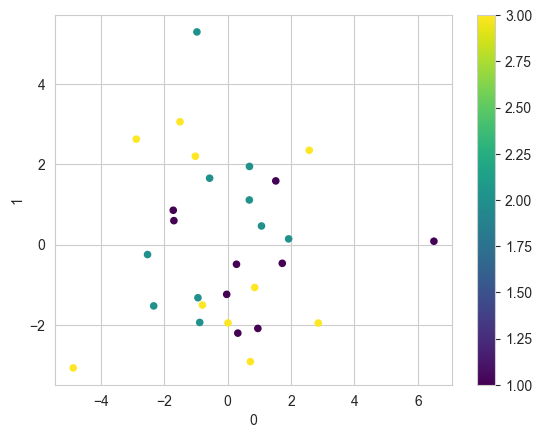

In [188]:
plt = pd.DataFrame(X_pca).plot.scatter(x=0, y=1, c=y_vals, colormap='viridis')

# SVM

In [85]:
from sklearn.svm import SVC

In [86]:

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Acc:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
test_pred_value_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(classification_report(y_test, y_pred, zero_division=0))

Acc: 0.3333333333333333
[[0 0 0]
 [2 1 0]
 [1 1 1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.50      0.33      0.40         3
           3       1.00      0.33      0.50         3

    accuracy                           0.33         6
   macro avg       0.50      0.22      0.30         6
weighted avg       0.75      0.33      0.45         6



# Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Acc:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
tree.feature_importances_

Acc: 0.3333333333333333
[[0 0 0]
 [1 0 2]
 [1 0 2]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.50      0.67      0.57         3

    accuracy                           0.33         6
   macro avg       0.17      0.22      0.19         6
weighted avg       0.25      0.33      0.29         6



array([0.        , 0.        , 0.04693878, 0.        , 0.234329  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09857143, 0.15515873, 0.10539889, 0.115     , 0.06571429,
       0.17888889, 0.        , 0.        ])

In [89]:
y_pred

array([1, 3, 3, 1, 3, 3], dtype=int64)

In [90]:
y_test

array([2, 3, 2, 3, 3, 2], dtype=int64)

# Filter

In [189]:
static_statistics_without_2 = static_statistics[static_statistics['rest_state'] != 2]

vals_cleared = static_statistics_without_2.drop([x for x in static_statistics.columns if "Lifetime" not in x], axis=1)
# vals_cleared = static_statistics_without_2.drop(['subject', 'filename', 'rest_state'], axis=1)
scaler = StandardScaler()
scaler.fit(vals_cleared)
normal_vals = scaler.transform(vals_cleared)
X_vals = normal_vals
y_vals = static_statistics_without_2['rest_state'].to_numpy()
X = X_vals
y = y_vals
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [190]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Acc:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
test_pred_value_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(classification_report(y_test, y_pred, zero_division=0))

Acc: 0.625
[[1 2]
 [1 4]]
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           3       0.67      0.80      0.73         5

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8



In [191]:
X_vals

array([[ 1.53634625,  1.12864691,  1.35267402,  0.99684488],
       [-0.52732808, -0.73996934, -0.29775344, -0.16433001],
       [-0.00478302,  0.8246768 , -0.91930382,  1.04845265],
       [-0.23954964,  0.50790795,  0.83672686,  0.2927674 ],
       [ 0.33222068, -0.23761874,  0.26646948,  0.41072803],
       [-0.83782587, -0.30801182, -0.24646045, -0.49978054],
       [-0.04264861, -0.70797249, -0.76844207, -0.72464298],
       [ 0.00657665, -0.53518948, -0.39430495, -0.7946821 ],
       [-0.75830814, -0.64077909, -0.1559434 , -0.36338857],
       [-0.90598392, -0.45839703, -0.33697749, -0.5292707 ],
       [-0.30392113, -0.79116431, -0.33999473, -0.7098979 ],
       [ 2.26336546,  2.68369399,  3.15698046,  2.39025475],
       [-1.22026827, -0.53198979, -0.30378791, -0.79836837],
       [-0.6257786 ,  0.07595043, -0.20421916,  0.18217932],
       [-0.65607107, -0.13522881, -0.86499359, -1.3513088 ],
       [ 2.44512026,  2.0693544 ,  1.21388122,  2.14696097],
       [-0.20168406, -0.

In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_vals, y_vals)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(X_vals)

[0.87124343 0.05828228 0.0427062  0.02776809]


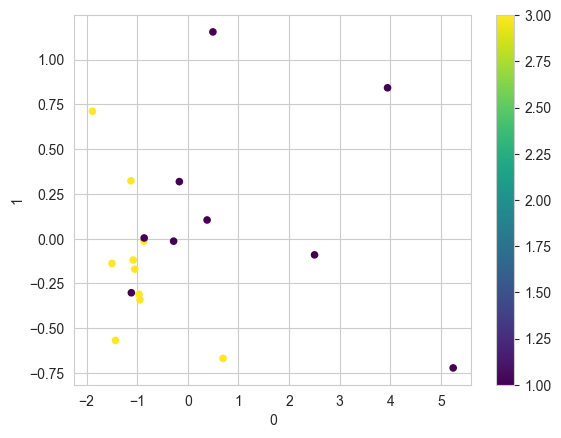

In [198]:
plt = pd.DataFrame(X_pca).plot.scatter(x=0, y=1, c=y_vals, colormap='viridis')

# Logistic regression 

In [84]:
static_statistics_without_2 = static_statistics[static_statistics['rest_state'] != 2]

vals_cleared = static_statistics_without_2.drop([x for x in static_statistics.columns if "Lifetime" not in x], axis=1)
# vals_cleared = static_statistics_without_2.drop(['subject', 'filename', 'rest_state'], axis=1)
scaler = StandardScaler()
scaler.fit(vals_cleared)
normal_vals = scaler.transform(vals_cleared)
X_vals = normal_vals
y_vals = static_statistics_without_2['rest_state'].to_numpy()
X = X_vals
y = y_vals



In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_vals, y_vals)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(X_vals)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

[0.87124343 0.05828228 0.0427062  0.02776809]


In [86]:
from sklearn.linear_model import BayesianRidge
logreg = BayesianRidge()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# print("Acc:", accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred, zero_division=0))


In [87]:
y_pred

array([2.27092704, 1.41303114, 2.36866387, 1.91289616, 1.95787279,
       2.39265334])

In [88]:
y_test

array([3, 1, 3, 1, 3, 1], dtype=int64)